In [1]:
import numpy as np
from numpy.fft import rfft,irfft
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/anze/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
Na=2048 # let's have Nachunks
Nx=2048 # of Nx samples for a total sample
N=Na*Nx #roughly milisecond
dt=1.0/2.5e9 #2.5 GSample/s
t=arange(N)*dt
tmax=N*dt
tmaxc=tmax/Na
print ("total sample = ",tmax/1e-3,"ms")

total sample =  1.6777216 ms


In [3]:
# generate sample
# we will generate tone at 1MHz, 102MHz, 203MHz, etc up to 1213MHz
sam=zeros(N)
for f in arange(1,1214,101):
    phi=f*1.0
    print ("Adding ",f,'MHz')
    sam+=sin(t*2*pi*f*1e6+phi)

Adding  1 MHz
Adding  102 MHz
Adding  203 MHz
Adding  304 MHz
Adding  405 MHz
Adding  506 MHz
Adding  607 MHz
Adding  708 MHz
Adding  809 MHz
Adding  910 MHz
Adding  1011 MHz
Adding  1112 MHz
Adding  1213 MHz


In [4]:
sam[-10:]

array([-0.50339924, -0.34134722, -0.6456572 , -0.39827342, -0.83605706,
       -0.46600525, -1.14322254, -0.5644643 , -1.80660081, -0.78502122])

In [5]:
## first the total fft
print ("Doing ffts")
for i in range(Na):
    ft=rfft(sam[i*Nx:(i+1)*Nx])
    pow=abs(ft*ft)
    if i==0:
        tpow=pow
    else:
        tpow+=pow
tpow/=Na
freq=arange(len(tpow))/tmaxc/1e6 ## In Mhz
## and the uncorrputed one
powid=rfft(sam)
powid=abs(powid*powid)
freqi=arange(len(powid))/tmax/1e6 

Doing ffts


In [6]:
def polyphase(sam,Nchan, Ntaps,dt,plot=False):
    """Nx is number of channels
       Na is number of taps"""
    Nt=Nchan*Ntaps
    assert(len(sam)==Nt)
    rang=arange(Nt)
    filt=numpy.sinc((rang-Nt/2)/(1.0*Nchan))
    if plot:
        plt.plot(filt)
    filt*=0.5*(1-cos(rang*2*np.pi/Nt))
    filt*=sam
    for j in range(Ntaps):
        if j==0:
            pp=filt[0:Nchan]
        else:
            pp+=filt[j*Nchan:(j+1)*Nchan]
    pow=rfft(pp)
    pow=abs(pow*pow)
    tmax=Nx*dt
    freq=arange(len(pow))/tmax/1e6
    return freq,pow

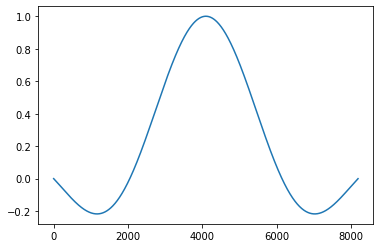

In [7]:
Ntaps=4
Nstart=0
Nstep=Ntaps*Nx
Nend=Nstep
res=[]
while Nend<N:
    fp,pp=polyphase(sam[Nstart:Nend],Nx,Ntaps,dt,plot=(Nstart==0))
    res.append(pp)
    Nstart+=Nstep
    Nend+=Nstep
res=np.array(res).mean(axis=0)


In [8]:
freq

array([0.00000000e+00, 1.22070312e+00, 2.44140625e+00, ...,
       1.24755859e+03, 1.24877930e+03, 1.25000000e+03])

[]

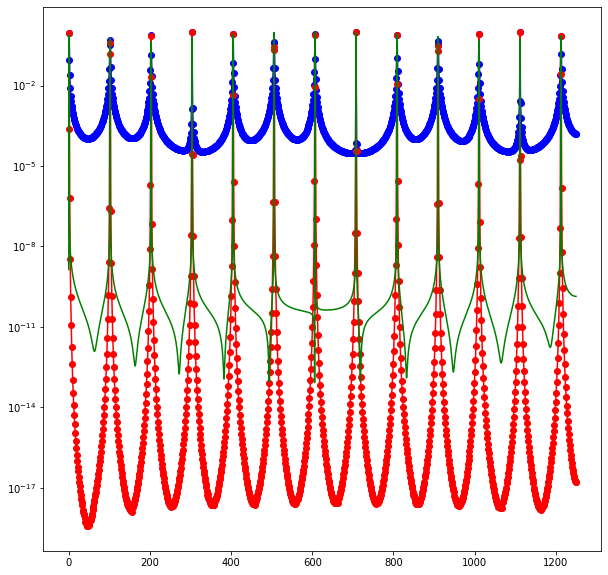

In [9]:
figure(figsize=(10,10))
plot(freq,tpow/tpow.max(),'bo-')
plot(fp,pp/pp.max(),'ro-')
plot(freqi,powid/powid.max(),'g-')
#xlim(800,1100)
semilogy()